### 로지스틱 회귀
- 선형 회귀 방식을 분류에 적용한 알고리즘
- 선형 회귀 방식을 기반으로 하되 일반 선형함수를 사용하는 것이 아니라 시그모이드 함수를 이용해 분류 수행

**로지스틱 회귀각 선형 회귀와 다른 점**
- 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아님
- 학습을 통해 시그모이드(Sigmoid) 함수의 최적선을 찾고, 시그모이드 함수의 반환 값을 확률로 간주
- 반환한 확률에 따라 분류를 결정하는 것이 가장 큰 차이

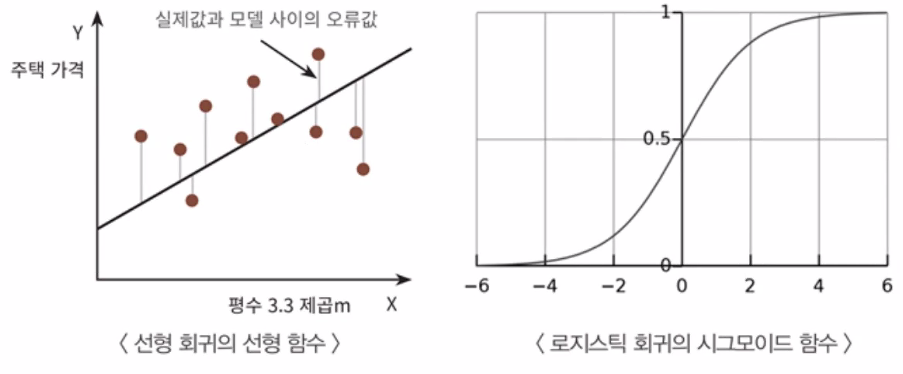

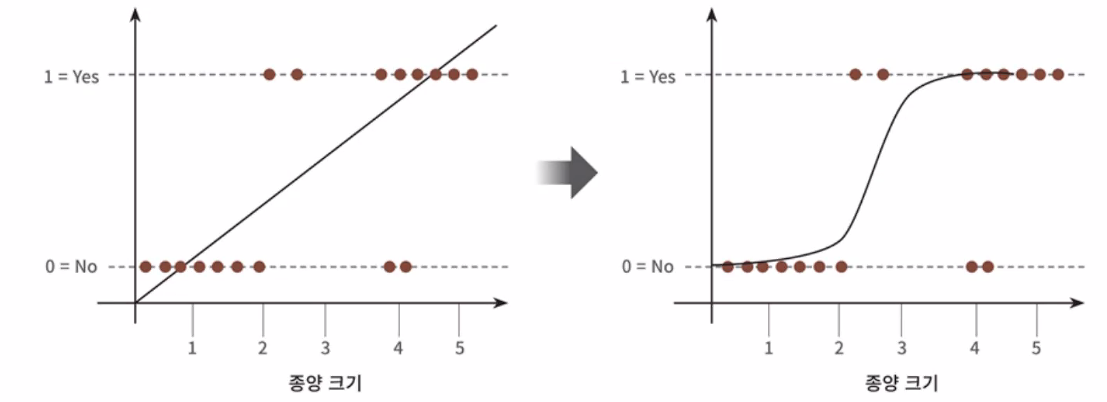

**(왼쪽 그래프) 종양 크기에 따라 악성이 될 확률이 높다고 한다면**
- X축 : 종양 크기
- Y축 : 종양 여부
- 회귀 적용 : 데이터가 모여 있는 곳으로 회귀 선을 그릴 수 있지만
- 회귀 선은 0과 1을 제대로 분류하지 못함
- 선형 회귀가 분류를 못하는 것은 아니지만 정확도가 떨어짐  

**(오른쪽 그래프) S자 커브 형태의 시그모이드 함수 이용**
- 좀 더 정확하게 0과 1에 대해 분류 가능

**로지스틱 회귀**
- 선형 회귀 방식을 기반으로 하되 시그모이드 함수를 이용해 분류를 수행하는 회귀


## 로지스틱 회귀 예제

위스콘신 유방암 데이터 세트를 이용해서 로지스틱 회귀로 암 여부 판단

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

# 데이터 로드
cancer = load_breast_cancer()


In [14]:
## 선현회귀 계열의 로지스틱 회귀는 데이터의 정규분포도에 예측 서능 영향을 받을 수 있음
## 데이터를 정규분포 형태로 표준 스케일링을 적용한 뒤 학습/테스트 데이터 세트 분리

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 스케일링
# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

# 데이터 분리
X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)


In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression(solver='liblinear') # solver 파라미터 : 최적화 문제에 사용하는 알고리즘

lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

LogisticRegression(solver='liblinear')

accuracy: 0.982
roc_auc: 0.979


### 하이퍼 파라미터 튜닝
- GridSearchCV를 이용해 하이퍼 파라미터 최적화

**LogisticRegression 클래스의 주요 하이퍼 파라미터**
- penalty : 규제 유형 설정 (l1, l2 규제) : l2가 기본
- C : 규제 강도를 조절하는 alpha 값의 역수
- C = 1/alpha
- C 값이 작을수록 규제 강도가 큼

In [17]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 설정
params = {'penalty':['l2','l1'],
          'C':[0.01, 0.1, 1, 5, 10]}

# GridSearchCV 이용해서 최적의 하이퍼 파라미터 찾음
grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)

print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))


GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 5, 10], 'penalty': ['l2', 'l1']},
             scoring='accuracy')

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도:0.979


로지스틱 회귀 정리
- 가볍고 빠름
- 이진 분류 예측 성능도 뛰어남
- 이 때문에 이진 분류의 기본 모델로 사용하는 경우가 많음
- 또한 **희소 행렬로 표현되는 텍스트 기반의 분류에서도 자주 사용**됨
